In [1]:
import numpy as np
import matplotlib.image as mp_img
import matplotlib.pyplot as mlb_plt

In [2]:
original_image = mp_img.imread("Efes.JPG") 

In [3]:
image = original_image.astype("uint8")

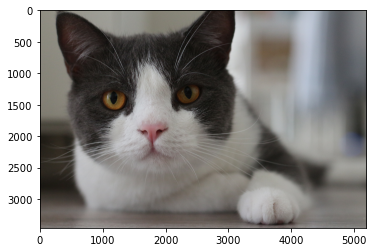

In [4]:
mlb_plt.imshow(original_image)

# # # Red, green and blue channel pixel values of the image file “Efes.JPG”.  
# Convert it to a grayscale image, and name it as Efes_gray 

In [5]:
def RGB_gray_scale(img):
        gray = np.zeros(img.shape)
        R = np.array(img[:, :, 0])
        G = np.array(img[:, :, 1])
        B = np.array(img[:, :, 2])

        R = (R *0.299)
        G = (G *0.587)
        B = (B *0.114)

        Avg = (R+G+B)
        gray = img.copy()

        for i in range(3):
           gray[:,:,i] = Avg    
        return gray       

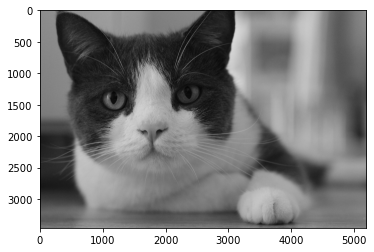

In [6]:
Efes_gray = RGB_gray_scale(original_image)
mlb_plt.imshow(Efes_gray)

# Plotting 16, 32 and 64-bin-histograms of Efes_gray 

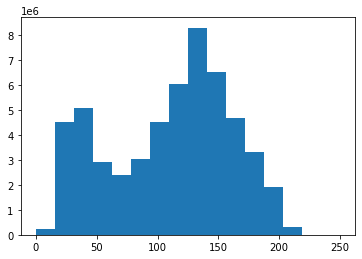

In [7]:
from skimage import io
ax_16 = mlb_plt.hist(Efes_gray.ravel(), bins = 16)
mlb_plt.show()

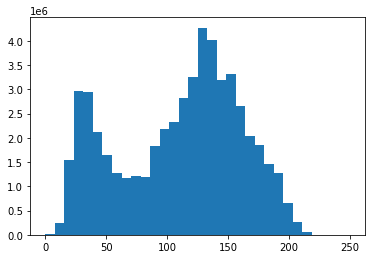

In [8]:
ax_32 = mlb_plt.hist(Efes_gray.ravel(), bins = 32)
mlb_plt.show()

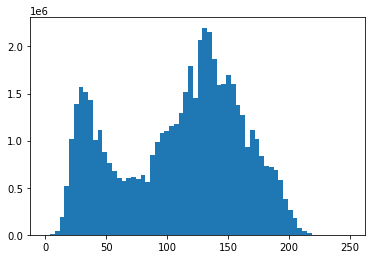

In [9]:
ax_64 = mlb_plt.hist(Efes_gray.ravel(), bins = 64)
mlb_plt.show()

# Inspect the histogram and picking a value as a threshold. Obtaining a binary image called Efes_yourBinary out of Efes_gray using threshold value  

In [10]:

import cv2
import skimage
T = 100
ret,Efes_yourBinary = cv2.threshold(Efes_gray,T,255,cv2.THRESH_BINARY)


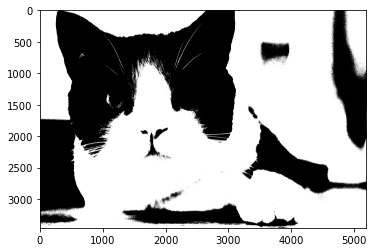

In [11]:
mlb_plt.imshow(Efes_yourBinary,cmap="gray")

# Obtain a threshold value using Otsu’s algorithm and naming that image as Efes_OTSU 

In [12]:

ret,Efes_OTSU = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret)

97.0


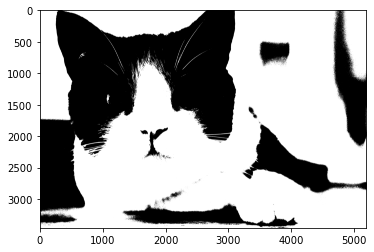

In [13]:
#cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mlb_plt.imshow(Efes_OTSU, cmap='gray')

# Comparing Efes_yourBinary and Efes_OTSU

Efes binary is an image that i created by setting the threshold manual and simple binary thresholding requires manual selection of a threshold value and is not adaptive to the image content, whereas I named the image which i implemented OTSU thresholding as Efes_OTSU and Otsu thresholding is automated and adaptive. Otsu thresholding can handle more complex images and can produce more accurate segmentation results.My images which includes a 100 threshold Efes binary and Efes OTSU by a 97 threshold became similar.

# Developing  method(s) to locate the “eyes” and “nose” of the cat 

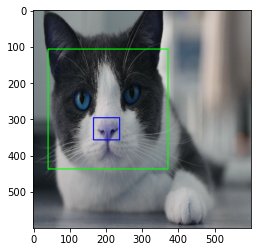

In [6]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Load the cat image
image = cv2.imread('Efes.JPG')
img = cv2.resize(image,(600,600))

# Convert the image to grayscale
Efes_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the pre-trained Haar Cascade classifiers for detecting cat face, eyes, and nose
face_cascade = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
nose_cascade = cv2.CascadeClassifier('haarcascade_mcs_nose.xml')


# Detect cat face in the image
cat_faces = face_cascade.detectMultiScale(Efes_gray, scaleFactor=1.1, minNeighbors=5)
for (x, y, w, h) in cat_faces:
    # Draw a rectangle around the face
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
# Iterate over the detected cat faces
for (x,y,w,h) in cat_faces:
     # Extract the region of interest (ROI) around the cat face
    roi_gray = Efes_gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    # Detect the eyes in the ROI
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)
    # Iterate over the detected eyes
    for (ex,ey,ew,eh) in eyes:
        # Draw a bounding box around the eyes
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    # Detect nose in the ROI
    noses = nose_cascade.detectMultiScale(roi_gray)
    for (nx, ny, nw, nh) in noses:
    # Draw a rectangle around the nose
        cv2.rectangle(roi_color, (nx, ny), (nx+nw, ny+nh), (0, 0, 255), 2)        
        
        
# Display the image with detected eyes and nose



plt.imshow(img) 
plt.show() 

# # # What’s the difference between “image processing” and “computer vision”? 

Even thought image processing and computer vision are 2 related fields,there are some differences;

Image processing refers to the manipulation of an image to enhance its visual quality,
extract useful information, or transform it into a different representation.
Image processing techniques are used to remove noise, adjust brightness and contrast,
filter out unwanted information and the related operations about the image processing.

Computer vision, on the other hand, involves the analysis and interpretation of images to extract 
meaningful information about the scene or object being observed. Computer vision techniques are used to
detect and track objects, estimate their properties (size, shape, and orientation),
recognize patterns and faces, and perform other high-level tasks that require understanding of the image
content. Computer vision is a broader field that encompasses image processing as a subset.
